In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams['figure.figsize'] = [15,12]
font = {'size': 22}
matplotlib.rc('font', **font)

In [2]:
K = 12
shift = 3
fkt = lambda x: K*((x-shift)/K)**3

n_segments = 3
step = K // n_segments
points = [(0,0)]
for i in range(0, n_segments+1):
    x = i*step + shift
    y = fkt(x)
    points.append((x,y))

print(points)
    

tmp = list(zip(*points))
xs_lin = tmp[0]
ys_lin = tmp[1]


params = []
for idx, (px,py) in enumerate(points[1:]):
    prev_x, prev_y = points[idx]
    m = (py-prev_y) / (px-prev_x)
    c = py - m * px
    params.append((m,c))


def fkt_lin(x):
    for idx, (px,py) in enumerate(points[1:]):
        prev_x, prev_y = points[idx]
        if prev_x <= x <= px:
            m, c = params[idx]
            return m*x+c


[(0, 0), (3, 0.0), (7, 0.4444444444444443), (11, 3.5555555555555545), (15, 12.0)]


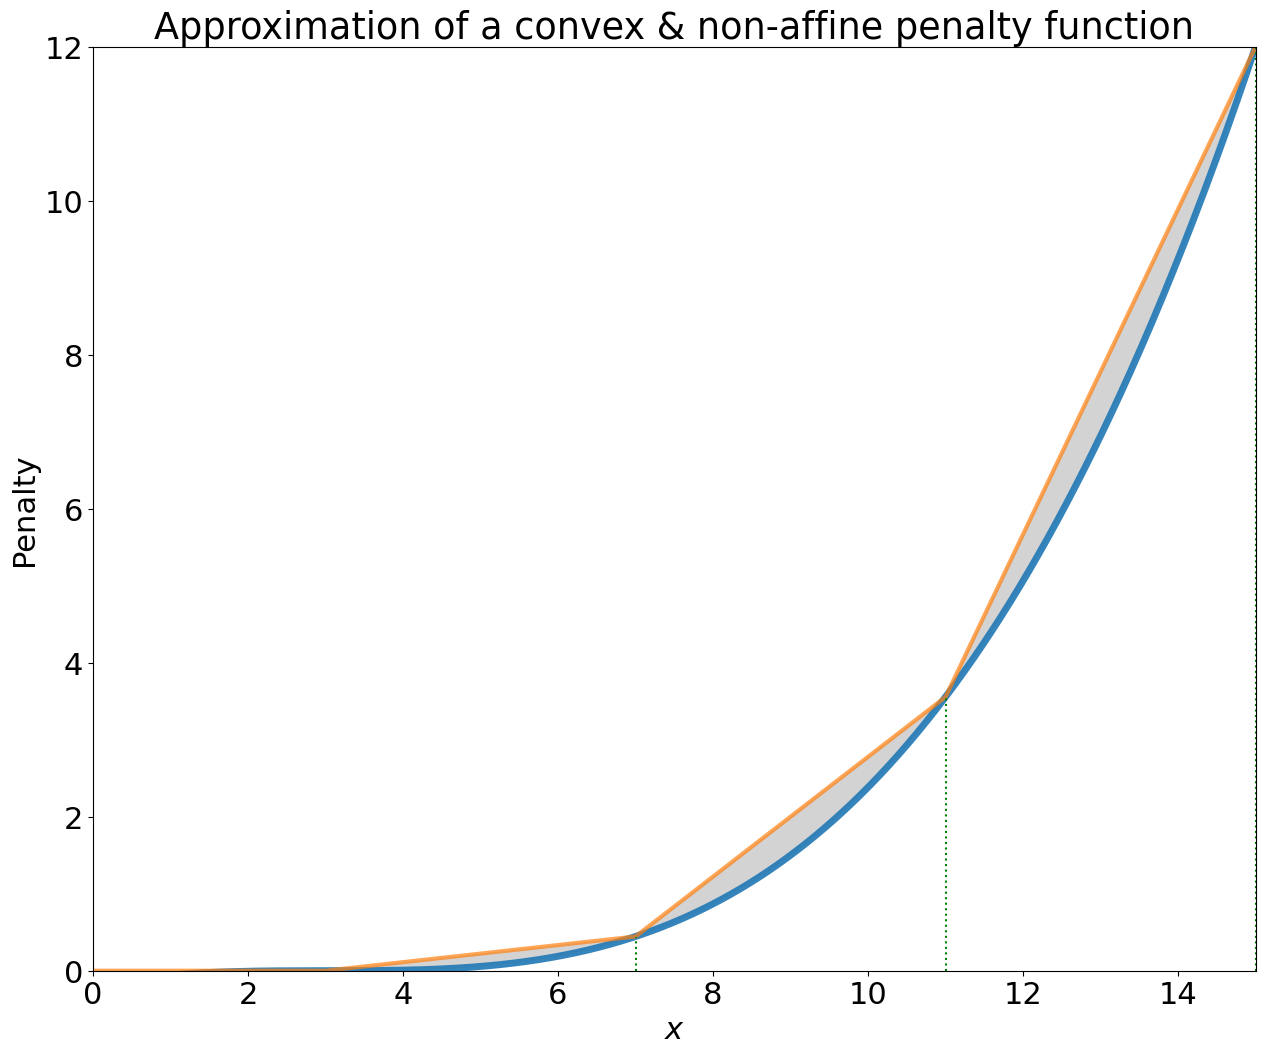

In [3]:
xs = np.linspace(0, K+shift, 1000)
ys = fkt(xs)
plt.plot(xs, ys, linewidth=5, alpha=0.9)
plt.plot(xs_lin, ys_lin, linewidth=3, alpha=0.7)

for x,y in points:
    plt.plot([x, x], [0, y], 'g:')

plt.xlim(0,K+shift)
plt.ylim(0,K)

plt.fill_between(xs, fkt(xs), [fkt_lin(x) for x in xs], facecolor='lightgrey')


plt.xlabel('$x$')
plt.ylabel('Penalty')
plt.title('Approximation of a convex & non-affine penalty function')

#plt.grid(True)
plt.savefig('my_function.png')
plt.show()

# Ohne Zahlen

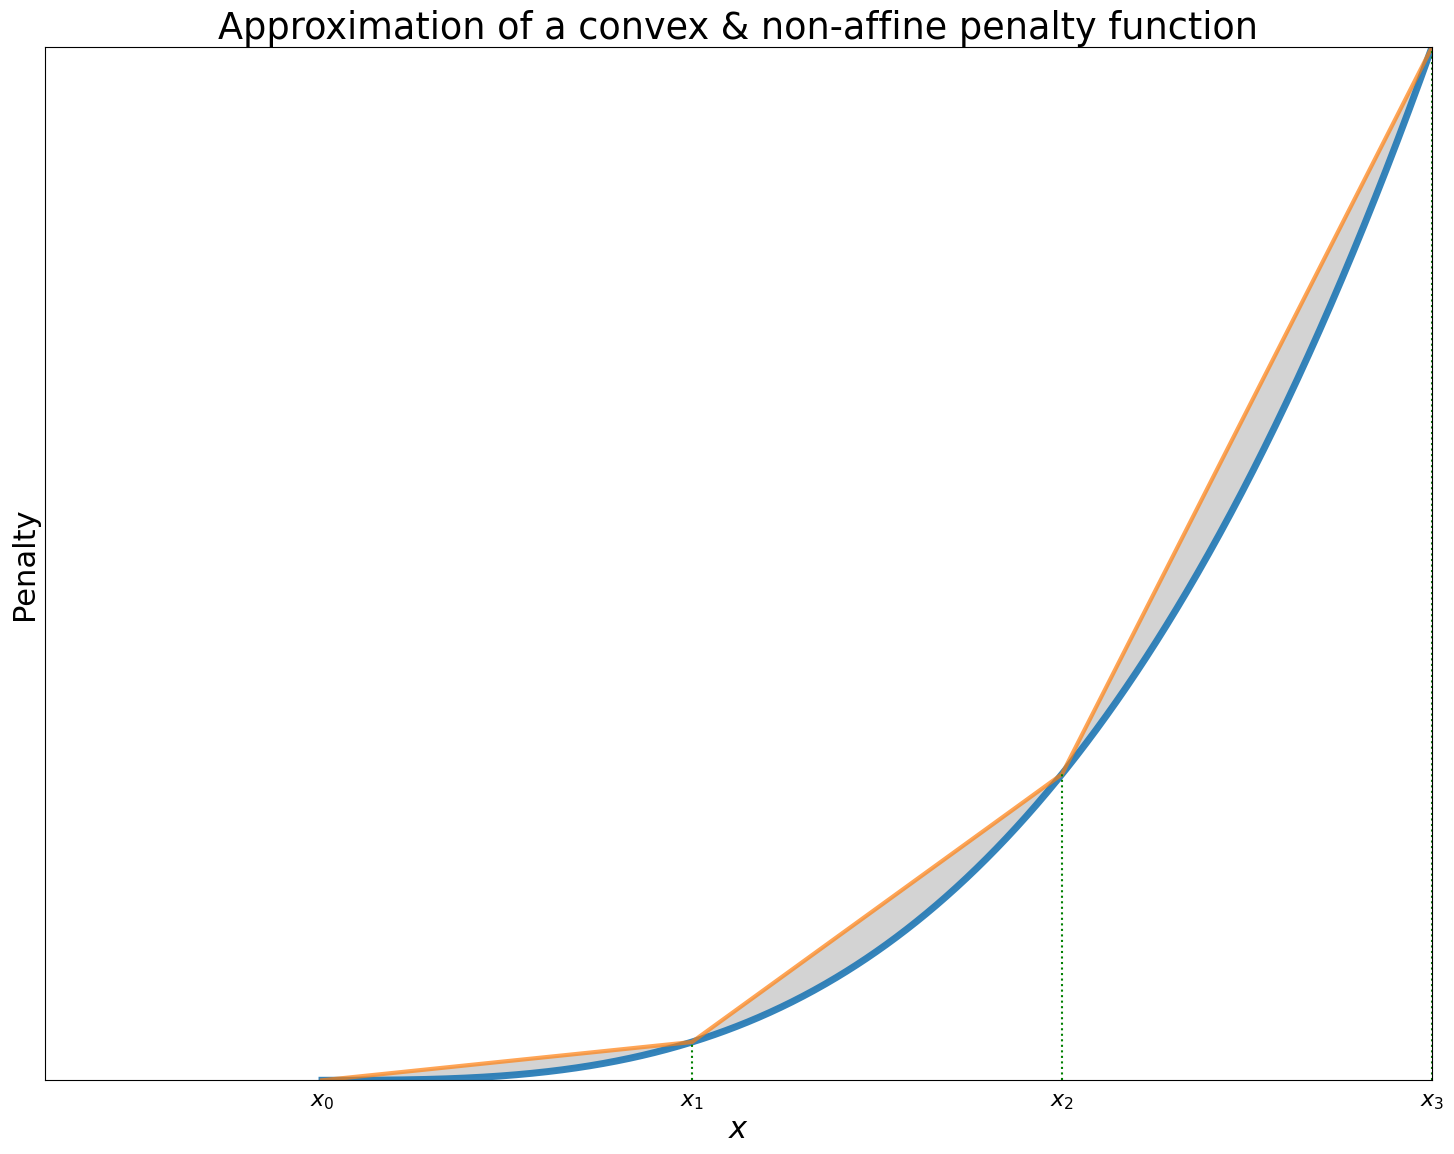

In [4]:
xs = np.linspace(shift, K+shift, 1000)
ys = fkt(xs)

tmp = list(zip(*points))
xs_lin = tmp[0][1:]
ys_lin = tmp[1][1:]

plt.plot(xs, ys, linewidth=5, alpha=0.9)
plt.plot(xs_lin, ys_lin, linewidth=3, alpha=0.7)


for idx, (x,y) in enumerate(points[1:]):
    plt.plot([x, x], [0, y], 'g:')
    plt.text(x, -0.3, f"$x_{idx}$", fontsize=16, 
             horizontalalignment='center')

plt.xlim(0,K+shift)
plt.ylim(0,K)

plt.fill_between(xs, fkt(xs), [fkt_lin(x) for x in xs], facecolor='lightgrey')


plt.xlabel('$x$', labelpad=25)
plt.ylabel('Penalty')
plt.title('Approximation of a convex & non-affine penalty function')

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      
    top=False,         
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False) 

plt.tight_layout()
plt.savefig('my_function.png')
plt.show()

# ...